In [1]:
from tvshow import getTitle, getAllEpisodesRatings
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the data

The format of the data, used to make the graphs, retorned from the scraping part is a dataframe with seasons, episodes and ratings by episode, where `episode` is a continuous sequence, i.e., there aren't two occurances of the same episode number, even in different seasons.

This data is returned by the function `getAllEpisodesRatings` which is called with the id of a TV show in [imdb](https://www.imdb.com/).

Here, an example:

In [2]:
getAllEpisodesRatings('tt1190634').head()

,season,episode,rating
0,1,1,8.8
1,1,2,8.6
2,1,3,8.5
3,1,4,8.8
4,1,5,8.5


Besides that, I use the function `getTitle` to get the title of the TV show so I can show it on the graph.

In [3]:
getTitle('tt1190634')

'The Boys'

# Visualizations

## Episodes

Using the data requested with the TV shows ids I have the function `plotTVShowsEpisodes` that shows a 2D graph where we can see how the ratings change through the episodes and even compare the episodes ratings between different TV shows.

In [4]:
def plotTVShowsEpisodes(tvshows_ids:list):
    sns.set_style('darkgrid')
    plt.figure(figsize=(15,5))
    plt.title("Episodes ratings", fontdict={'fontsize': 15}, pad=15)
    
    for ident in tvshows_ids:
        df = getAllEpisodesRatings(ident)
        sns.lineplot(data=df, x='episode', y='rating', marker='.', markersize=15, label=getTitle(ident))
    
    plt.yticks([i for i in range(11)]);
    plt.legend(loc=3, fontsize='x-large');
    plt.xlabel('Episodes', {'fontsize': 12})
    plt.ylabel('Ratings', {'fontsize': 12})

With the function defined, it is sufficient just call it with any ids.

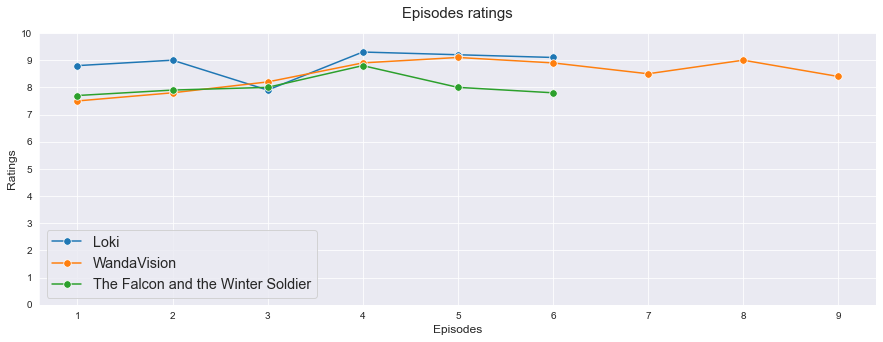

In [5]:
plotTVShowsEpisodes(['tt9140554', 'tt9140560', 'tt9208876'])

Looking at these series from MCU we can see that people found all the episodes 3 similar at quality and that, at general, Loki seems better.

One more example:

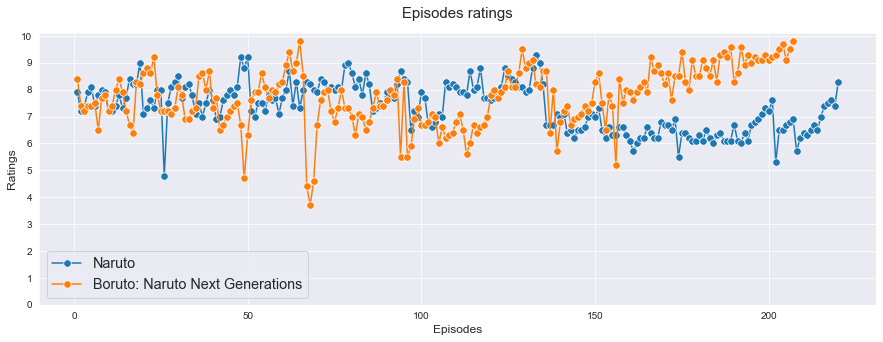

In [5]:
plotTVShowsEpisodes(['tt0409591', 'tt6342474'])

## Seasons

Similar with the other function, here I have `plotTVShowsSeasons` that shows the mean rating for the seasons of TV shows, and I have one more data at the graph which is the standard deviation that makes possible to us see how the episodes rating of a season variates comparing it with other seasons or other TV shows.

In [2]:
def plotTVShowsSeasons(tvshows_ids):
    plt.figure(figsize=(15,5))
    sns.set_style('darkgrid')
    plt.title("Seasons ratings", fontdict={'fontsize': 15}, pad=15)
    
    for ident in tvshows_ids:
        df = getAllEpisodesRatings(ident)
        sns.lineplot(data=df, x='season', y='rating', marker='.', markersize=15, label=getTitle(ident))

    plt.yticks([i for i in range(11)]);
    plt.legend(loc=3, fontsize='x-large');
    plt.xlabel('Seasons', {'fontsize': 12})
    plt.ylabel('Ratings', {'fontsize': 12})

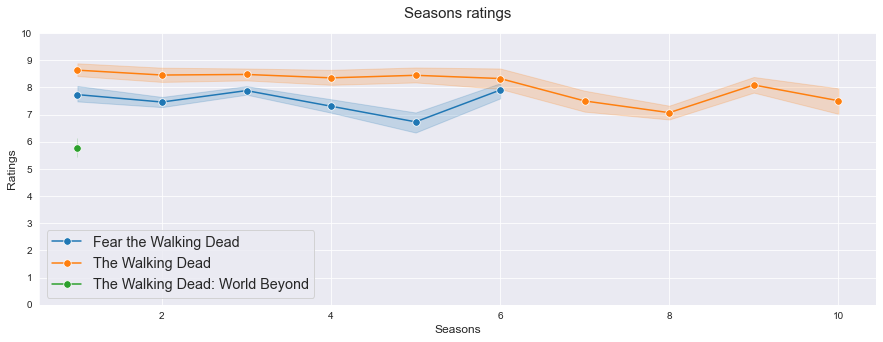

In [3]:
plotTVShowsSeasons(['tt3743822', 'tt1520211', 'tt10148174'])

Above we can that seasons 6, 7 and 10 of The Walking Dead were the ones that most variate comparing them with the other seasons. And also, none season of the spin-offs of The Walking Dead got better mean rating.

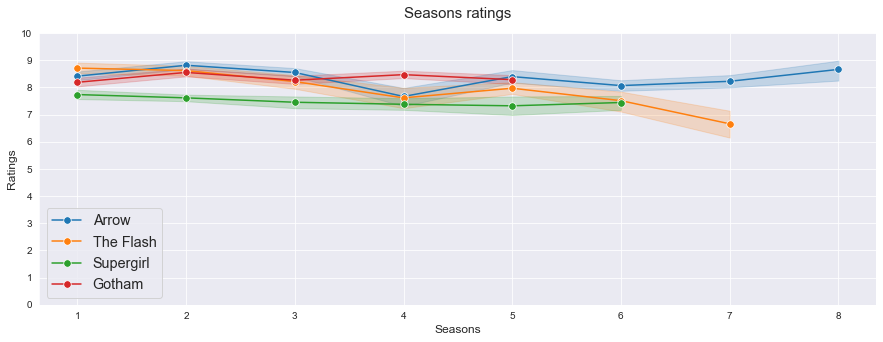

In [8]:
plotTVShowsSeasons(['tt2193021', 'tt3107288', 'tt4016454', 'tt3749900'])

At some DC series we see that the worst season had also high variation.